In [1]:
"""
Update Parameters Here
"""
COLLECTION = "8_BIT_UNIVERSE"
MINT_PRICE = 0.08888
MAX_TOKEN_ID = 8888
FIRST_N_TOKENS = 100

In [2]:
"""
@author: mdigi14
"""

import requests
import pandas as pd
import matplotlib.pyplot as plt


SALES_DATA = "first_flip_revenue/{}_{}.csv".format(COLLECTION, "first_sale_revenue")


"""
Plot params
"""
plt.rcParams.update({"figure.facecolor": "white", "savefig.facecolor": "white"})

Total profit on first flip:  382.65516932740314
Profit on first flip for first 100 tokens:  186.27607744948332
Percentage of first flip profits from first 100 tokens:  0.49


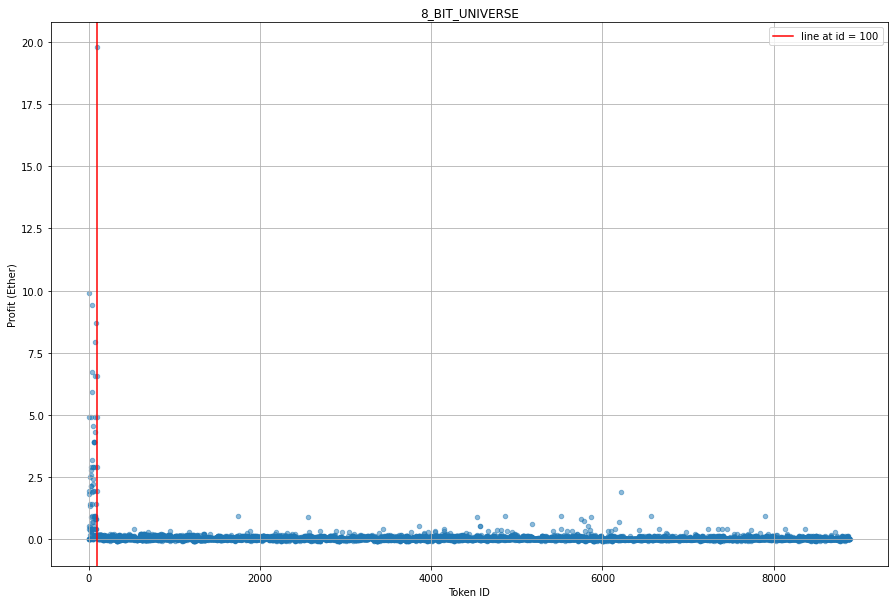

In [3]:
"""
Generate Plot
"""

sales = pd.read_csv("{}".format(SALES_DATA))

price_dict = pd.Series(sales["price"].values, index=sales["id"]).to_dict()
seen = set(sales["id"])

for i in range(0, MAX_TOKEN_ID):
    if i not in seen:
        price_dict[i] = MINT_PRICE

dict_list = []
for i in range(0, MAX_TOKEN_ID):
    dict_entry = {"id": i, "profit": price_dict[i] - MINT_PRICE}

    dict_list.append(dict_entry)


profits = pd.DataFrame(dict_list)
profits = profits.sort_values(by=["id"])
profits.to_csv("first_flip_profits/{}_profits.csv".format(COLLECTION))


total_collection_profits = profits["profit"].sum()
print("Total profit on first flip: ", total_collection_profits)

grifter_df = profits[profits["id"] < FIRST_N_TOKENS]
grifter_profits = grifter_df["profit"].sum()
print("Profit on first flip for first 100 tokens: ", grifter_profits)

print(
    "Percentage of first flip profits from first {} tokens: ".format(FIRST_N_TOKENS),
    round(grifter_profits / total_collection_profits, 2),
)

profits.plot.scatter(
    x="id", y="profit", grid=True, alpha=0.5, title="{}".format(COLLECTION)
)
plt.xlabel("Token ID")
plt.ylabel("Profit (Ether)")
plt.axvline(x=FIRST_N_TOKENS, label="line at id = {}".format(FIRST_N_TOKENS), c="r")
plt.gcf().set_size_inches(15, 10)
plt.legend()